# Derivatives using Python
The file *myder.py* contains the same forward-difference, backward-difference, central-difference, and higher-order algorithms as was coded in MATLAB. We need to use the *numpy* package to import some useful functions to calculate the derivatives of 
$$\sin^2{\left(\frac{1}{x(2-x)}\right)}$$ and the data in *derdata.mat* (yes python can load *.mat* files as well)

Building a anonymous (or lambda) function in Python:

In [2]:
import math as mth
import numpy as np
fun = lambda x: mth.sin(1/(x*(2-x)))**2
funv = np.vectorize(fun)

To graph a function, import the *pyplot* package

In [3]:
x = np.linspace(-0.3,0.3,num=250)
import matplotlib.pyplot as pyp
pyp.plot(x,funv(x))

Now import the *myder* package

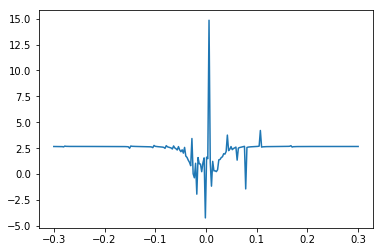

In [4]:
import myder
fdfunv = myder.forwardiff(fun,-0.3,0.3,251)
cdfunv = myder.centraldiff(fun,-0.3,0.31,250)
hodfunv = myder.hodiff(fun, -0.3,0.31,250)
x = np.linspace(-0.3,0.3,num=250)
pyp.plot(x,(cdfunv-hodfunv)/cdfunv)

Now with data. The MATLAB work has already shown that whether you use forward difference or a higher order method, you arrive at the same answer (that is unless you wish to interpolate your data - which is alwasy an option, you just need to make some additional assumptions). So, let's just use the python *diff*

In [5]:
import scipy.io as spi
matfile = spi.loadmat('C:\\Users\\Tom K\\Google Drive\\Programs\\GradCompPhys\\MATLAB\\derdata.mat')
X=matfile['X'];
Y=matfile['Y'];

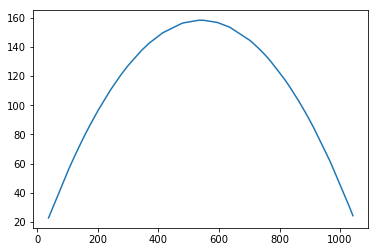

In [6]:
pyp.plot(X,Y)

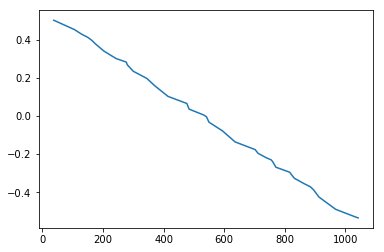

In [7]:
yprime = np.diff(Y,1,0)/np.diff(X,1,0)
pyp.plot(X[0:38],yprime)

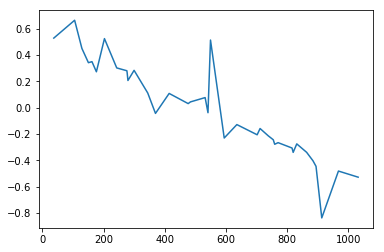

In [8]:
ydprime = np.diff(np.diff(Y,1,0),1,0)/np.diff(np.diff(X,1,0),1,0)
pyp.plot(X[0:37],ydprime)

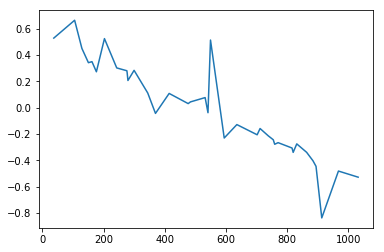

In [9]:
ydprime = np.diff(Y,2,0)/np.diff(X,2,0)
pyp.plot(X[0:37],ydprime)

Looking at the second derivatives, you should see sharp discontinuities, which will happen whenever dealing with unevenly spaced data (just like *derdata.mat* provided). You should note that $X$ and $Y$ were random points I took from a projectile fired on the moon with an initial velocity of 45 m/s, 2 meters from the ground. Meaning that the second derivative should be a constant equal to the gravitational field of the moon, 1.6 m/s$^2$. Clearly it is not. Take home message: be very careful when taking derivatives of data.